In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train = pd.read_csv('C:\\Users\\maslo\\OneDrive\\Рабочий стол\\MachineLearning_lab3\\train.csv')
test = pd.read_csv('C:\\Users\\maslo\\OneDrive\\Рабочий стол\\MachineLearning_lab3\\test.csv')


In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


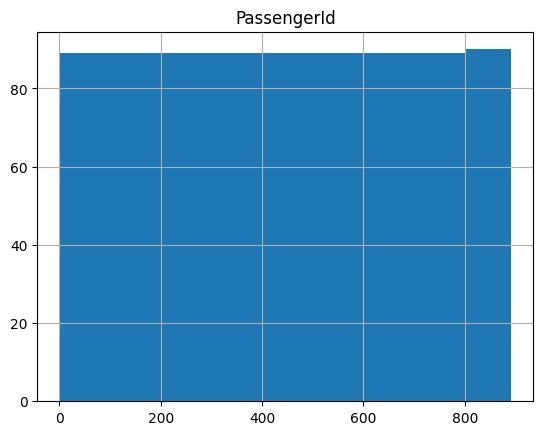

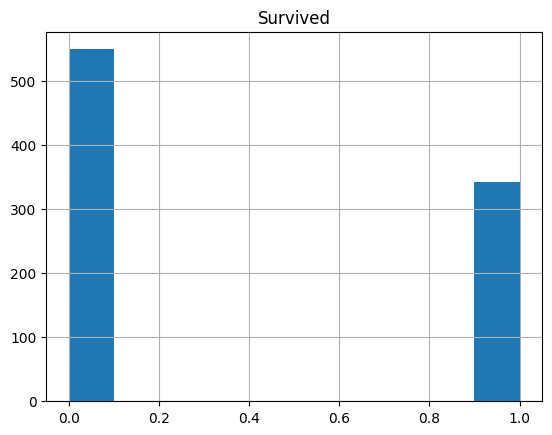

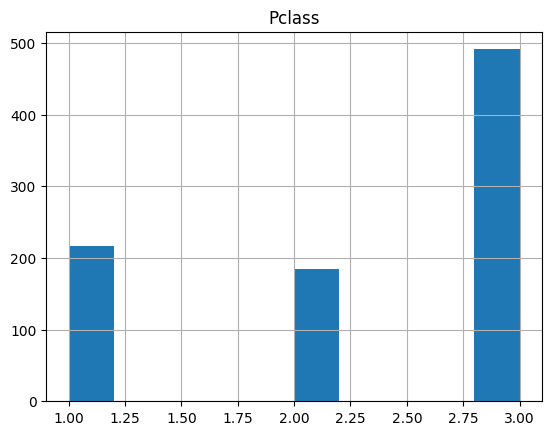

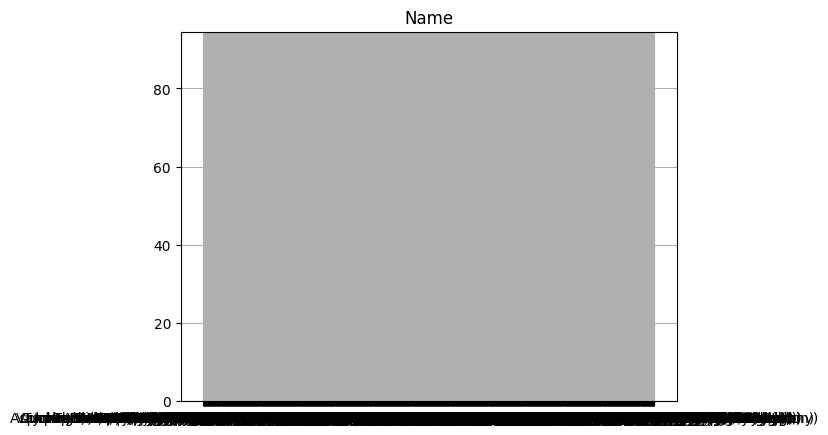

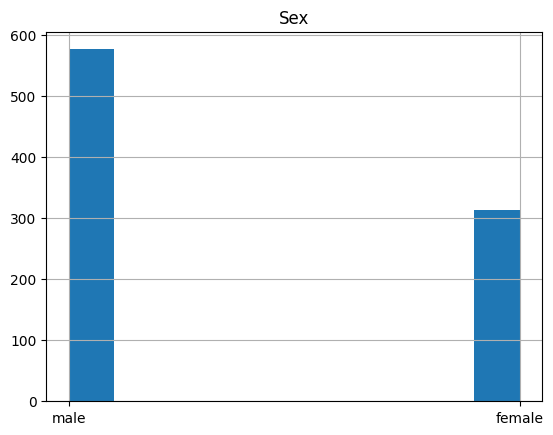

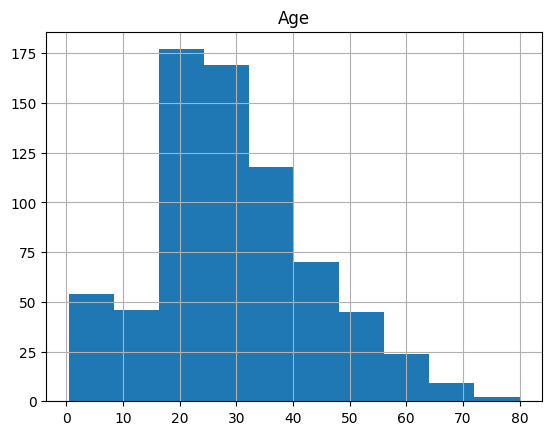

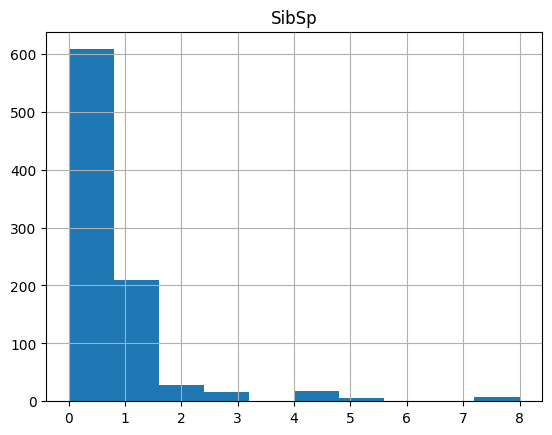

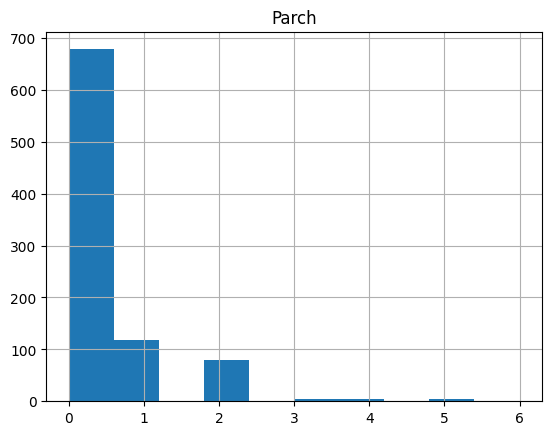

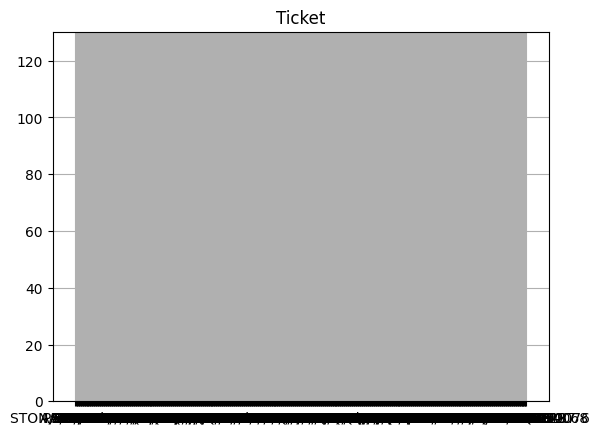

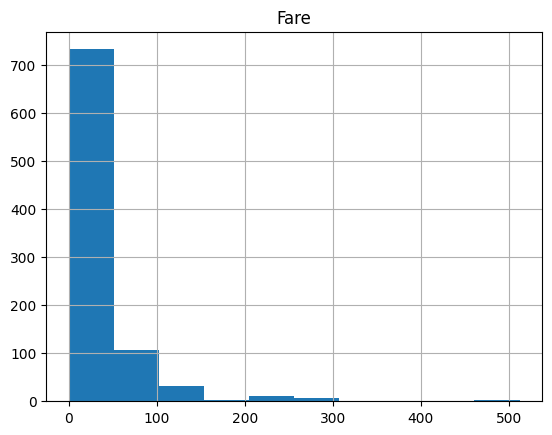

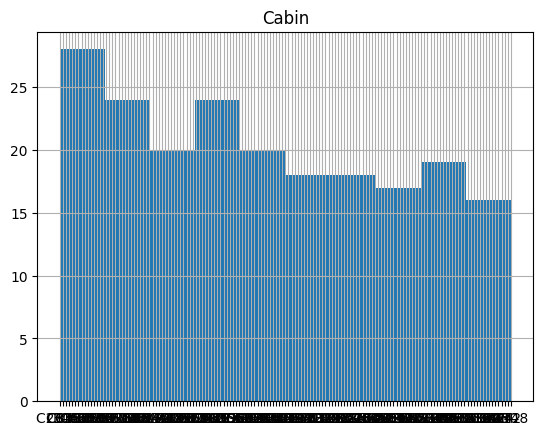

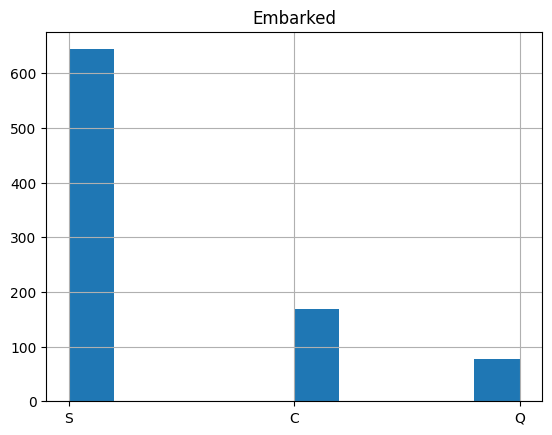

In [19]:
for col in train.columns:
    plt.figure()
    train[col].hist()
    plt.title(col)
    plt.show()

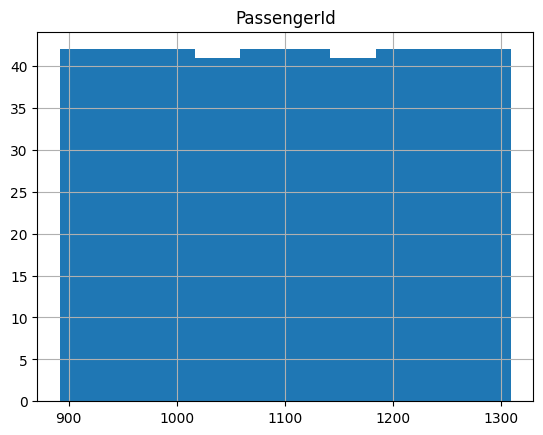

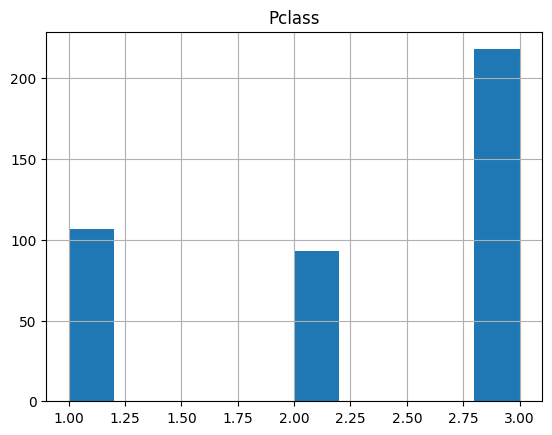

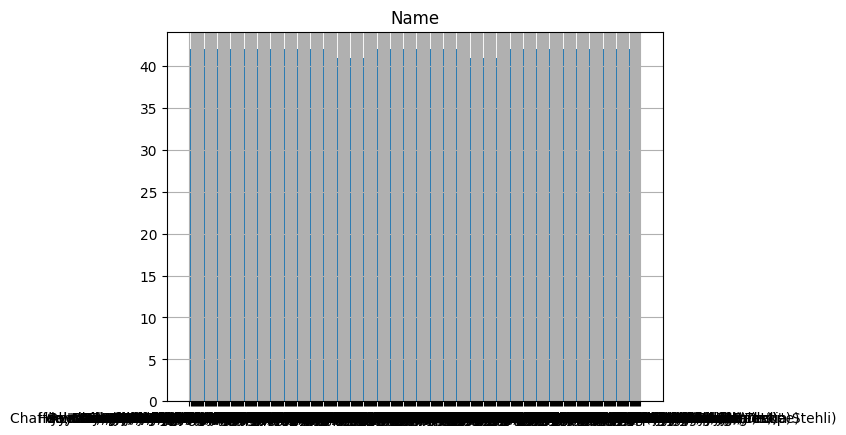

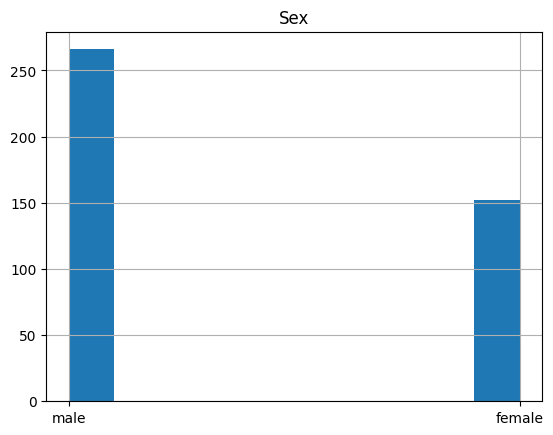

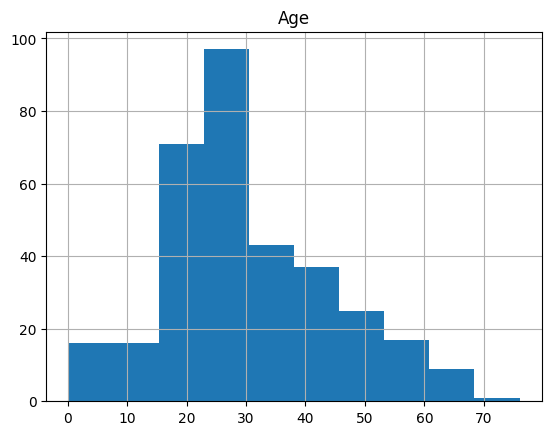

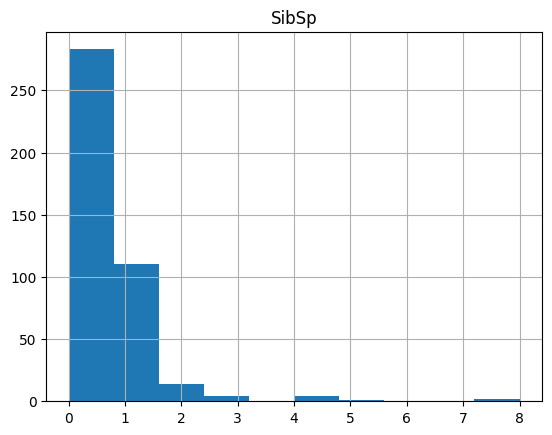

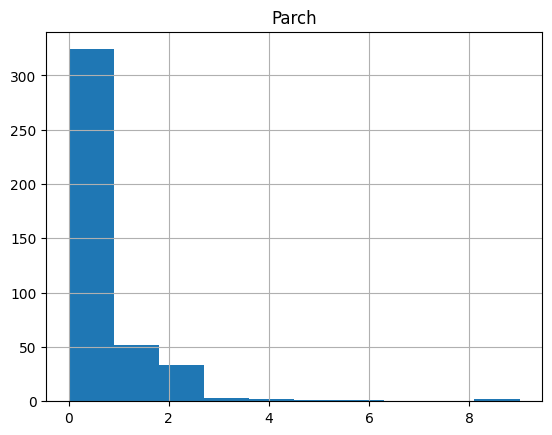

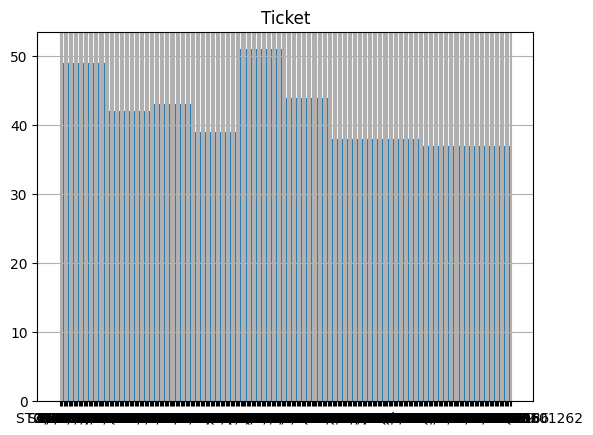

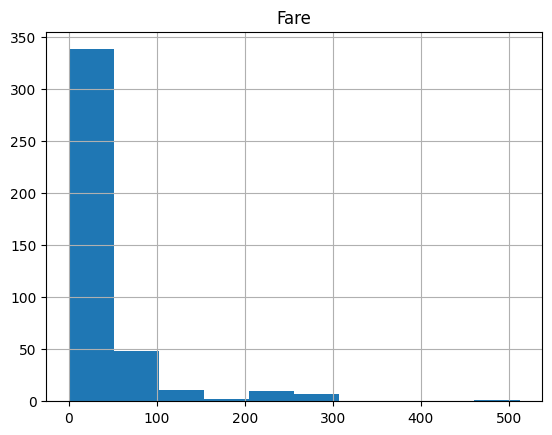

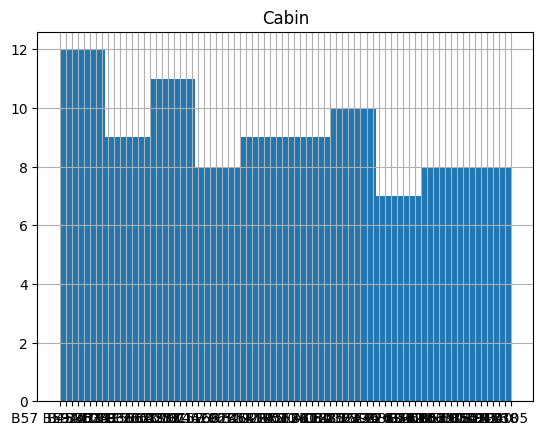

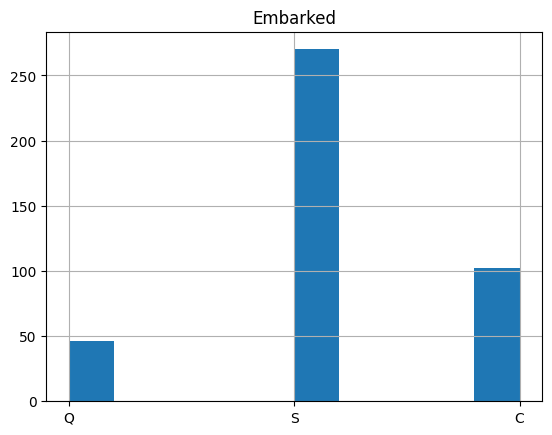

In [20]:
for col in test.columns:
    plt.figure()
    test[col].hist()
    plt.title(col)
    plt.show()

In [22]:
print(train.info())

print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

We can see that there are missing values in the data. Let's fill them in before continuing.

In [24]:
train.fillna({'Age': train['Age'].median(), 'Embarked': train['Embarked'].mode()[0]}, inplace=True)
test.fillna({'Age': test['Age'].median(), 'Fare': test['Fare'].median()}, inplace=True)

For further processing and analysis, let's get rid of extra columns:

In [25]:
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId','Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

Code the categorical variables:

In [26]:
train = pd.get_dummies(train, columns=['Sex', 'Embarked'])
test = pd.get_dummies(test, columns=['Sex', 'Embarked'])

First, let's visualize the data using a scatter diagram:

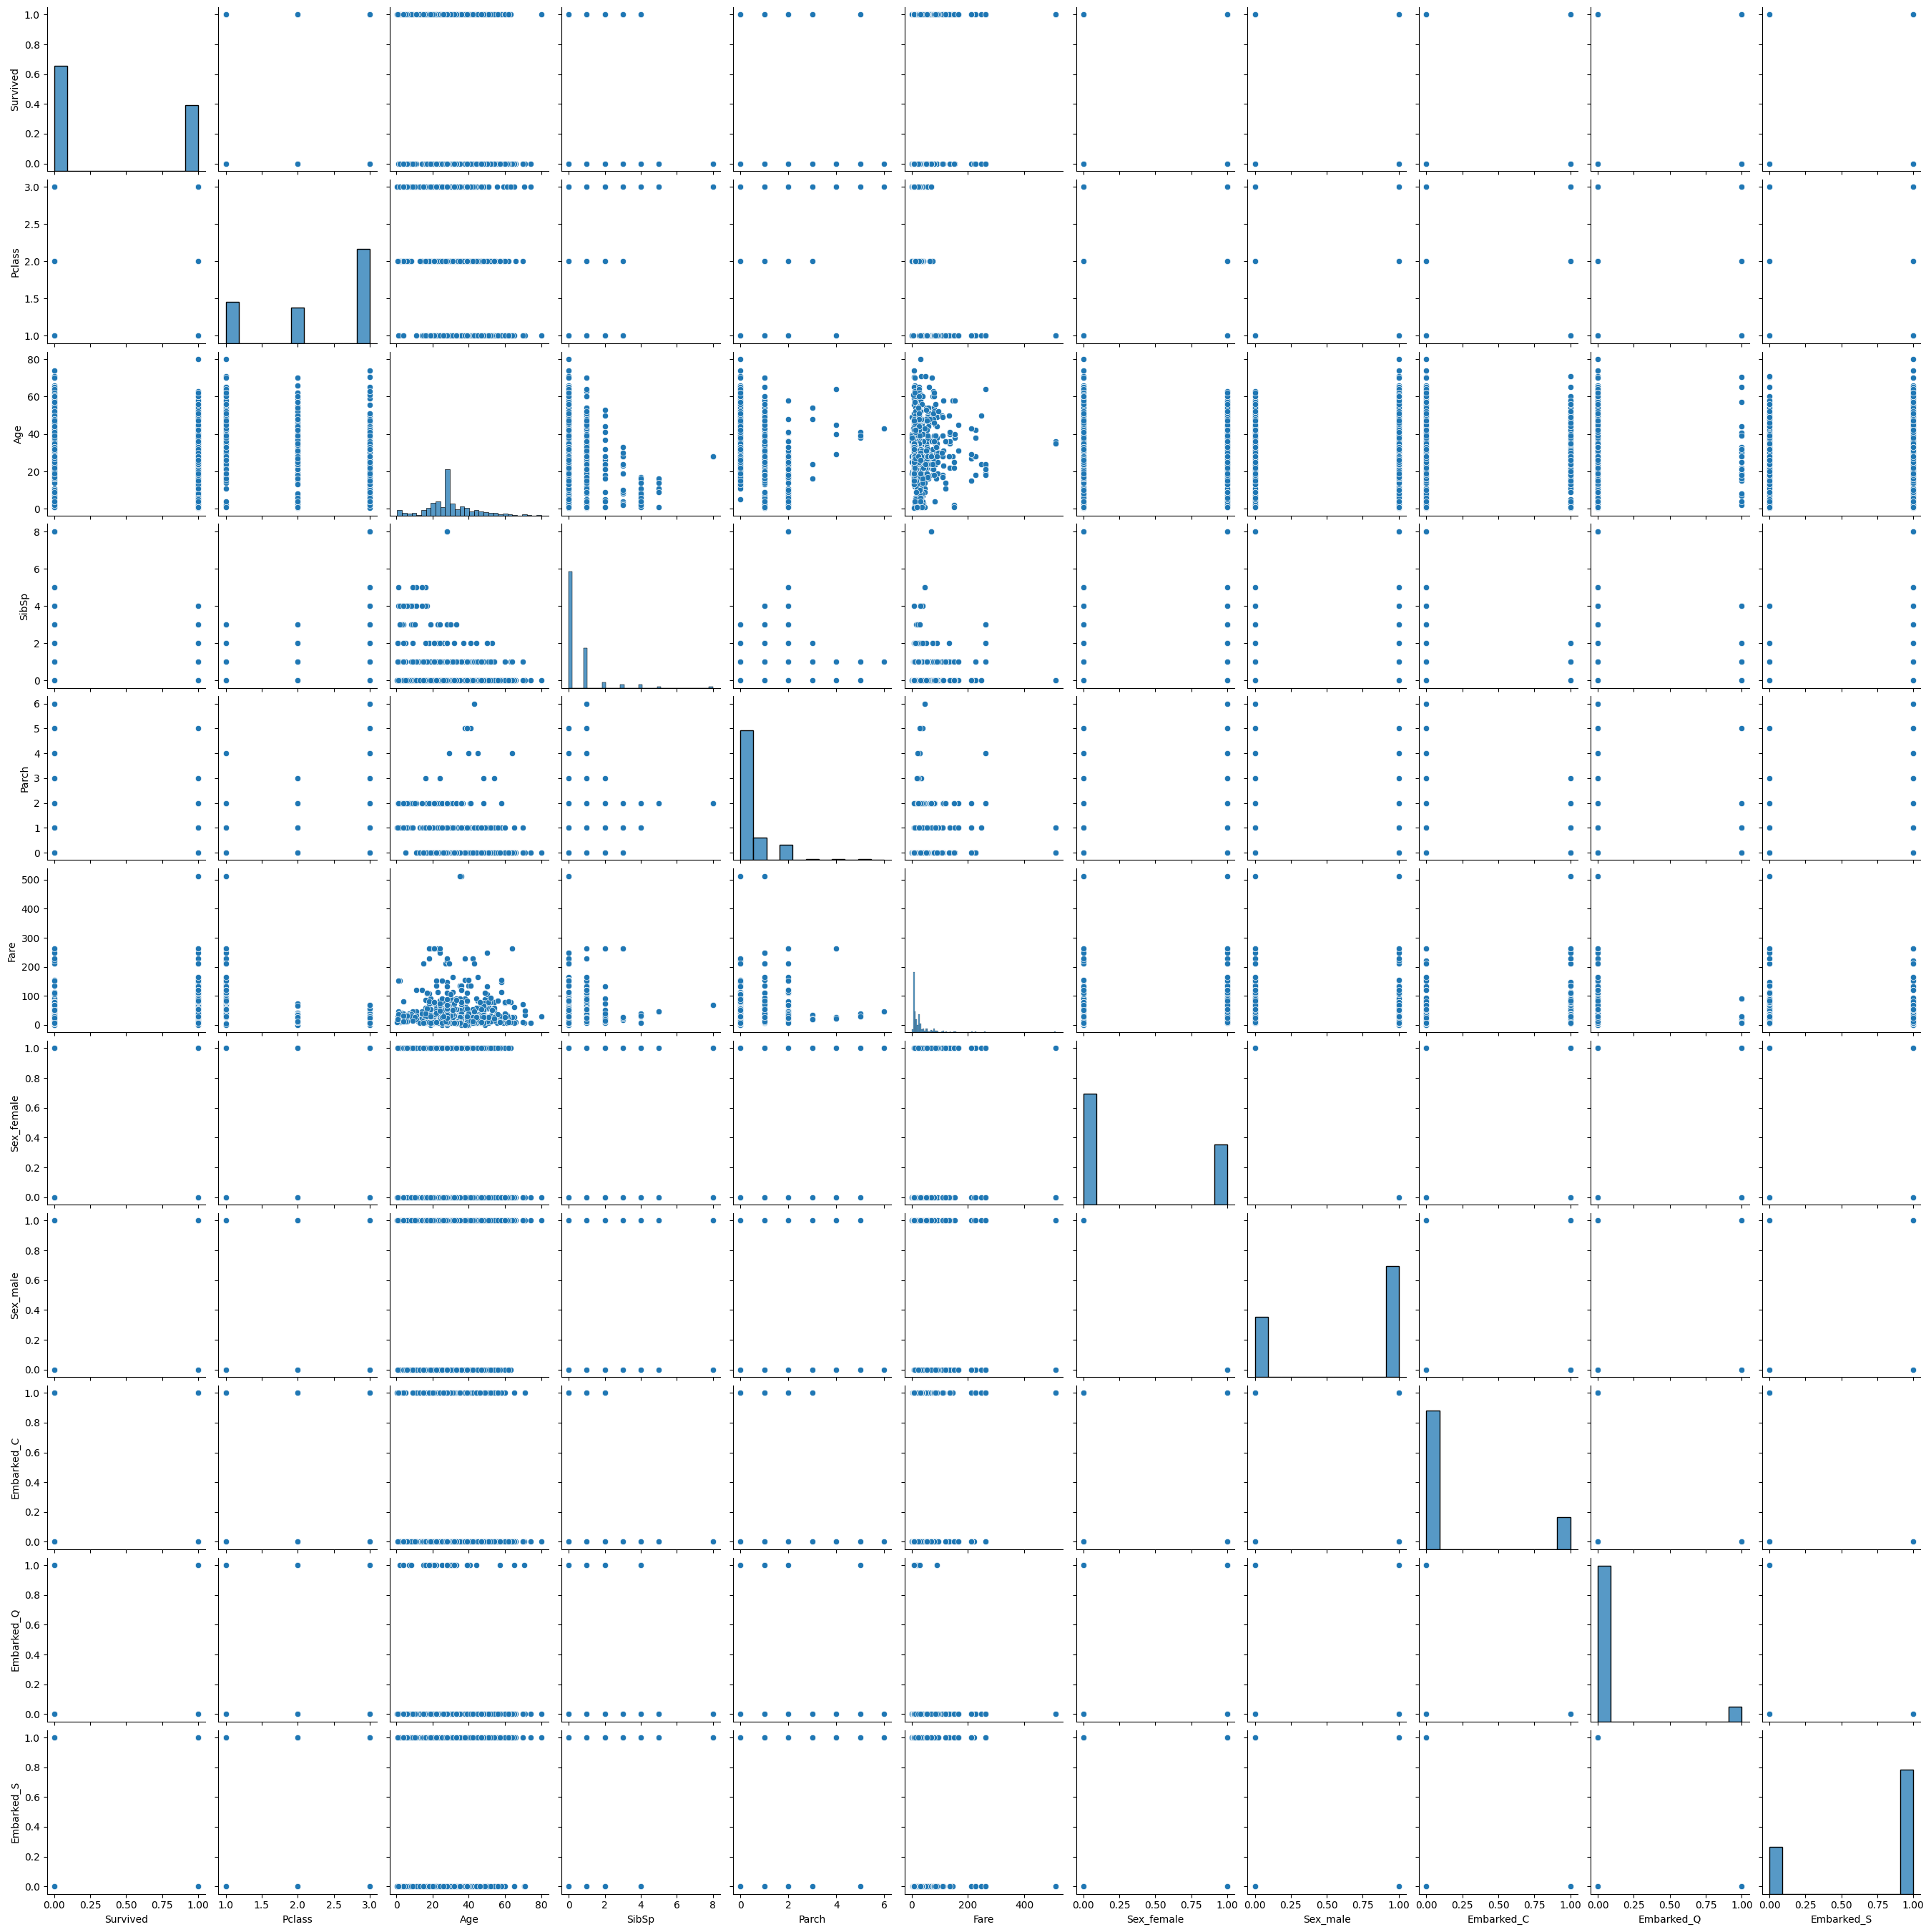

In [27]:
sns.pairplot(train)

With the help of this diagram, you can observe the relationships between different variables.
For clustering, we will use k-means and Agglomerative:

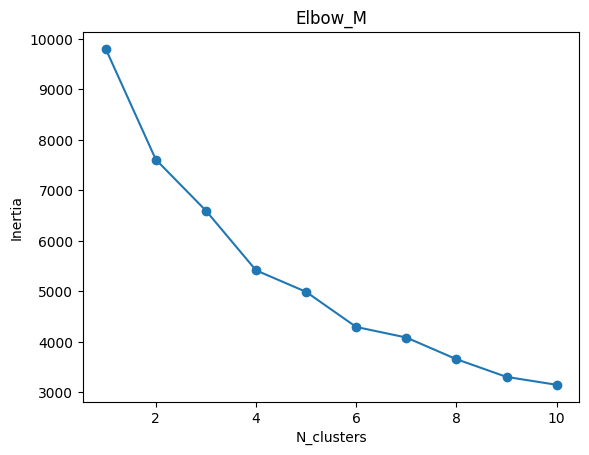

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
X = scaler.fit_transform(train)
Y = scaler.fit_transform(test)

inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow_M')
plt.xlabel('N_clusters')
plt.ylabel('Inertia')
plt.show()


it can be seen from the graph that the most optimal number of clusters will be 3, so now we will do clustering on the test data and display the result on the screen

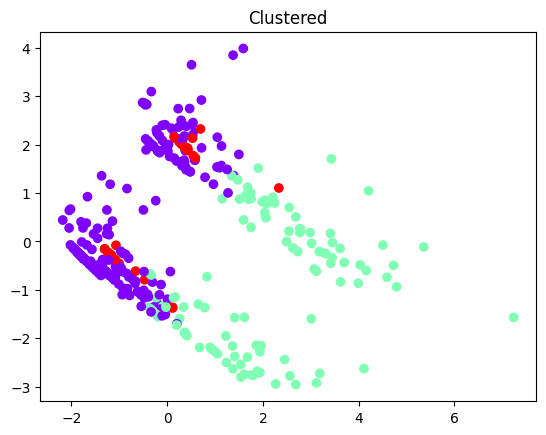

In [29]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels = cluster.fit_predict(Y)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(Y)

plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='rainbow')
plt.title('Clustered')
plt.show()
